In [1]:
%matplotlib inline
%pprint

Pretty printing has been turned OFF


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import requests
import json
import pprint
import copy

# Load the team data

In [3]:
#request nhl api for team data into json format
response = requests.get('https://statsapi.web.nhl.com/api/v1/teams')
response

<Response [200]>

In [4]:
data = response.json()['teams']
data

[{'id': 1, 'name': 'New Jersey Devils', 'link': '/api/v1/teams/1', 'venue': {'name': 'Prudential Center', 'link': '/api/v1/venues/null', 'city': 'Newark', 'timeZone': {'id': 'America/New_York', 'offset': -4, 'tz': 'EDT'}}, 'abbreviation': 'NJD', 'teamName': 'Devils', 'locationName': 'New Jersey', 'firstYearOfPlay': '1982', 'division': {'id': 18, 'name': 'Metropolitan', 'nameShort': 'Metro', 'link': '/api/v1/divisions/18', 'abbreviation': 'M'}, 'conference': {'id': 6, 'name': 'Eastern', 'link': '/api/v1/conferences/6'}, 'franchise': {'franchiseId': 23, 'teamName': 'Devils', 'link': '/api/v1/franchises/23'}, 'shortName': 'New Jersey', 'officialSiteUrl': 'http://www.newjerseydevils.com/', 'franchiseId': 23, 'active': True}, {'id': 2, 'name': 'New York Islanders', 'link': '/api/v1/teams/2', 'venue': {'id': 5026, 'name': 'Barclays Center', 'link': '/api/v1/venues/5026', 'city': 'Brooklyn', 'timeZone': {'id': 'America/New_York', 'offset': -4, 'tz': 'EDT'}}, 'abbreviation': 'NYI', 'teamName':

In [5]:
# plot json into dataframe
dataDF = pd.DataFrame(data)
dataDF

,id,name,link,venue,abbreviation,teamName,locationName,firstYearOfPlay,division,conference,franchise,shortName,officialSiteUrl,franchiseId,active
0,1,New Jersey Devils,/api/v1/teams/1,"{'name': 'Prudential Center', 'link': '/api/v1...",NJD,Devils,New Jersey,1982,"{'id': 18, 'name': 'Metropolitan', 'nameShort'...","{'id': 6, 'name': 'Eastern', 'link': '/api/v1/...","{'franchiseId': 23, 'teamName': 'Devils', 'lin...",New Jersey,http://www.newjerseydevils.com/,23,True
1,2,New York Islanders,/api/v1/teams/2,"{'id': 5026, 'name': 'Barclays Center', 'link'...",NYI,Islanders,New York,1972,"{'id': 18, 'name': 'Metropolitan', 'nameShort'...","{'id': 6, 'name': 'Eastern', 'link': '/api/v1/...","{'franchiseId': 22, 'teamName': 'Islanders', '...",NY Islanders,http://www.newyorkislanders.com/,22,True
2,3,New York Rangers,/api/v1/teams/3,"{'id': 5054, 'name': 'Madison Square Garden', ...",NYR,Rangers,New York,1926,"{'id': 18, 'name': 'Metropolitan', 'nameShort'...","{'id': 6, 'name': 'Eastern', 'link': '/api/v1/...","{'franchiseId': 10, 'teamName': 'Rangers', 'li...",NY Rangers,http://www.newyorkrangers.com/,10,True
3,4,Philadelphia Flyers,/api/v1/teams/4,"{'id': 5096, 'name': 'Wells Fargo Center', 'li...",PHI,Flyers,Philadelphia,1967,"{'id': 18, 'name': 'Metropolitan', 'nameShort'...","{'id': 6, 'name': 'Eastern', 'link': '/api/v1/...","{'franchiseId': 16, 'teamName': 'Flyers', 'lin...",Philadelphia,http://www.philadelphiaflyers.com/,16,True
4,5,Pittsburgh Penguins,/api/v1/teams/5,"{'id': 5034, 'name': 'PPG Paints Arena', 'link...",PIT,Penguins,Pittsburgh,1967,"{'id': 18, 'name': 'Metropolitan', 'nameShort'...","{'id': 6, 'name': 'Eastern', 'link': '/api/v1/...","{'franchiseId': 17, 'teamName': 'Penguins', 'l...",Pittsburgh,http://pittsburghpenguins.com/,17,True
5,6,Boston Bruins,/api/v1/teams/6,"{'id': 5085, 'name': 'TD Garden', 'link': '/ap...",BOS,Bruins,Boston,1924,"{'id': 17, 'name': 'Atlantic', 'nameShort': 'A...","{'id': 6, 'name': 'Eastern', 'link': '/api/v1/...","{'franchiseId': 6, 'teamName': 'Bruins', 'link...",Boston,http://www.bostonbruins.com/,6,True
6,7,Buffalo Sabres,/api/v1/teams/7,"{'id': 5039, 'name': 'KeyBank Center', 'link':...",BUF,Sabres,Buffalo,1970,"{'id': 17, 'name': 'Atlantic', 'nameShort': 'A...","{'id': 6, 'name': 'Eastern', 'link': '/api/v1/...","{'franchiseId': 19, 'teamName': 'Sabres', 'lin...",Buffalo,http://www.sabres.com/,19,True
7,8,Montréal Canadiens,/api/v1/teams/8,"{'id': 5028, 'name': 'Bell Centre', 'link': '/...",MTL,Canadiens,Montréal,1909,"{'id': 17, 'name': 'Atlantic', 'nameShort': 'A...","{'id': 6, 'name': 'Eastern', 'link': '/api/v1/...","{'franchiseId': 1, 'teamName': 'Canadiens', 'l...",Montréal,http://www.canadiens.com/,1,True
8,9,Ottawa Senators,/api/v1/teams/9,"{'id': 5031, 'name': 'Canadian Tire Centre', '...",OTT,Senators,Ottawa,1990,"{'id': 17, 'name': 'Atlantic', 'nameShort': 'A...","{'id': 6, 'name': 'Eastern', 'link': '/api/v1/...","{'franchiseId': 30, 'teamName': 'Senators', 'l...",Ottawa,http://www.ottawasenators.com/,30,True
9,10,Toronto Maple Leafs,/api/v1/teams/10,"{'name': 'Scotiabank Arena', 'link': '/api/v1/...",TOR,Maple Leafs,Toronto,1917,"{'id': 17, 'name': 'Atlantic', 'nameShort': 'A...","{'id': 6, 'name': 'Eastern', 'link': '/api/v1/...","{'franchiseId': 5, 'teamName': 'Maple Leafs', ...",Toronto,http://www.mapleleafs.com/,5,True


In [6]:
#extract column holding html links to each team
teams = dataDF.iloc[:,2]
teams

0      /api/v1/teams/1
1      /api/v1/teams/2
2      /api/v1/teams/3
3      /api/v1/teams/4
4      /api/v1/teams/5
5      /api/v1/teams/6
6      /api/v1/teams/7
7      /api/v1/teams/8
8      /api/v1/teams/9
9     /api/v1/teams/10
10    /api/v1/teams/12
11    /api/v1/teams/13
12    /api/v1/teams/14
13    /api/v1/teams/15
14    /api/v1/teams/16
15    /api/v1/teams/17
16    /api/v1/teams/18
17    /api/v1/teams/19
18    /api/v1/teams/20
19    /api/v1/teams/21
20    /api/v1/teams/22
21    /api/v1/teams/23
22    /api/v1/teams/24
23    /api/v1/teams/25
24    /api/v1/teams/26
25    /api/v1/teams/28
26    /api/v1/teams/29
27    /api/v1/teams/30
28    /api/v1/teams/52
29    /api/v1/teams/53
30    /api/v1/teams/54
Name: link, dtype: object

In [7]:
#set col width to show entire link
pd.set_option('display.max_colwidth', None)
# append links to full URL 
rosterURLs = 'https://statsapi.web.nhl.com' + teams + '/roster'
rosterURLs

0      https://statsapi.web.nhl.com/api/v1/teams/1/roster
1      https://statsapi.web.nhl.com/api/v1/teams/2/roster
2      https://statsapi.web.nhl.com/api/v1/teams/3/roster
3      https://statsapi.web.nhl.com/api/v1/teams/4/roster
4      https://statsapi.web.nhl.com/api/v1/teams/5/roster
5      https://statsapi.web.nhl.com/api/v1/teams/6/roster
6      https://statsapi.web.nhl.com/api/v1/teams/7/roster
7      https://statsapi.web.nhl.com/api/v1/teams/8/roster
8      https://statsapi.web.nhl.com/api/v1/teams/9/roster
9     https://statsapi.web.nhl.com/api/v1/teams/10/roster
10    https://statsapi.web.nhl.com/api/v1/teams/12/roster
11    https://statsapi.web.nhl.com/api/v1/teams/13/roster
12    https://statsapi.web.nhl.com/api/v1/teams/14/roster
13    https://statsapi.web.nhl.com/api/v1/teams/15/roster
14    https://statsapi.web.nhl.com/api/v1/teams/16/roster
15    https://statsapi.web.nhl.com/api/v1/teams/17/roster
16    https://statsapi.web.nhl.com/api/v1/teams/18/roster
17    https://

In [8]:
testURL = rosterURLs.iloc[1]

In [9]:
response = requests.get(testURL)
response

<Response [200]>

In [10]:
# loop through all urls, append all json into one long list
rosterDump = []

for url in rosterURLs:
    try:
        roster = requests.get(url).json()
    except json.decoder.JSONDecodeError:
        rosterDump.append({'website': 'error'})
    else:
        rosterDump.append(roster)
    
rosterDump

[{'copyright': 'NHL and the NHL Shield are registered trademarks of the National Hockey League. NHL and NHL team marks are the property of the NHL and its teams. © NHL 2020. All Rights Reserved.', 'roster': [{'person': {'id': 8471233, 'fullName': 'Travis Zajac', 'link': '/api/v1/people/8471233'}, 'jerseyNumber': '19', 'position': {'code': 'C', 'name': 'Center', 'type': 'Forward', 'abbreviation': 'C'}}, {'person': {'id': 8471239, 'fullName': 'Cory Schneider', 'link': '/api/v1/people/8471239'}, 'jerseyNumber': '35', 'position': {'code': 'G', 'name': 'Goalie', 'type': 'Goalie', 'abbreviation': 'G'}}, {'person': {'id': 8474056, 'fullName': 'P.K. Subban', 'link': '/api/v1/people/8474056'}, 'jerseyNumber': '76', 'position': {'code': 'D', 'name': 'Defenseman', 'type': 'Defenseman', 'abbreviation': 'D'}}, {'person': {'id': 8475151, 'fullName': 'Kyle Palmieri', 'link': '/api/v1/people/8475151'}, 'jerseyNumber': '21', 'position': {'code': 'R', 'name': 'Right Wing', 'type': 'Forward', 'abbreviati

In [11]:
len(rosterDump)

31

# Find individual player's info dataset and stats dataset

In [12]:
rosterDump[0].keys()

dict_keys(['copyright', 'roster', 'link'])

In [13]:
rosterDump[0]['link']

'/api/v1/teams/1/roster'

In [14]:
rosterDump[0]['roster'][0].keys()

dict_keys(['person', 'jerseyNumber', 'position'])

In [15]:
rosterDump[1]['roster'][1]['person']['link']

'/api/v1/people/8476917'

In [16]:
rosterDump[1]['roster'][1]['position']

{'code': 'D', 'name': 'Defenseman', 'type': 'Defenseman', 'abbreviation': 'D'}

In [17]:
#loop through each roster to find how many person in each team(roster)
personInEachTeam = []
for i in range(len(rosterDump)):
    print(len(rosterDump[i]['roster']))

21
28
23
25
27
25
25
23
23
25
23
25
25
22
27
27
24
26
26
26
25
27
22
25
22
26
31
22
29
23
24


In [18]:
#append all persons from all rosters into one long list
personsLink = []
for i in range(len(rosterDump)):
    for j in range(len(rosterDump[i]['roster'])):
        personsLink.append(rosterDump[i]['roster'][j]['person']['link'])
personsLink  

['/api/v1/people/8471233', '/api/v1/people/8471239', '/api/v1/people/8474056', '/api/v1/people/8475151', '/api/v1/people/8476368', '/api/v1/people/8476923', '/api/v1/people/8476941', '/api/v1/people/8477038', '/api/v1/people/8477355', '/api/v1/people/8477401', '/api/v1/people/8477425', '/api/v1/people/8477509', '/api/v1/people/8477541', '/api/v1/people/8478401', '/api/v1/people/8478406', '/api/v1/people/8479291', '/api/v1/people/8479315', '/api/v1/people/8479407', '/api/v1/people/8479415', '/api/v1/people/8480002', '/api/v1/people/8481559', '/api/v1/people/8475231', '/api/v1/people/8476917', '/api/v1/people/8470187', '/api/v1/people/8471217', '/api/v1/people/8471306', '/api/v1/people/8472382', '/api/v1/people/8473463', '/api/v1/people/8473504', '/api/v1/people/8473544', '/api/v1/people/8473575', '/api/v1/people/8474066', '/api/v1/people/8474573', '/api/v1/people/8474586', '/api/v1/people/8474709', '/api/v1/people/8475181', '/api/v1/people/8475314', '/api/v1/people/8475754', '/api/v1/pe

In [19]:
len(personsLink)

772

In [20]:
personsLinkDF = pd.DataFrame(personsLink)
personsLinkDF

,0
0,/api/v1/people/8471233
1,/api/v1/people/8471239
2,/api/v1/people/8474056
3,/api/v1/people/8475151
4,/api/v1/people/8476368
...,...
767,/api/v1/people/8477447
768,/api/v1/people/8477478
769,/api/v1/people/8477931
770,/api/v1/people/8478462


In [21]:
peronsLinkSeries = personsLinkDF.iloc[:,0]
peronsLinkSeries

0      /api/v1/people/8471233
1      /api/v1/people/8471239
2      /api/v1/people/8474056
3      /api/v1/people/8475151
4      /api/v1/people/8476368
                ...          
767    /api/v1/people/8477447
768    /api/v1/people/8477478
769    /api/v1/people/8477931
770    /api/v1/people/8478462
771    /api/v1/people/8480727
Name: 0, Length: 772, dtype: object

In [22]:
pd.set_option('display.max_colwidth', None)
personURLs = 'https://statsapi.web.nhl.com' + peronsLinkSeries + '/stats?stats=statsSingleSeason&season=20192020'
personURLs

0      https://statsapi.web.nhl.com/api/v1/people/8471233/stats?stats=statsSingleSeason&season=20192020
1      https://statsapi.web.nhl.com/api/v1/people/8471239/stats?stats=statsSingleSeason&season=20192020
2      https://statsapi.web.nhl.com/api/v1/people/8474056/stats?stats=statsSingleSeason&season=20192020
3      https://statsapi.web.nhl.com/api/v1/people/8475151/stats?stats=statsSingleSeason&season=20192020
4      https://statsapi.web.nhl.com/api/v1/people/8476368/stats?stats=statsSingleSeason&season=20192020
                                                     ...                                               
767    https://statsapi.web.nhl.com/api/v1/people/8477447/stats?stats=statsSingleSeason&season=20192020
768    https://statsapi.web.nhl.com/api/v1/people/8477478/stats?stats=statsSingleSeason&season=20192020
769    https://statsapi.web.nhl.com/api/v1/people/8477931/stats?stats=statsSingleSeason&season=20192020
770    https://statsapi.web.nhl.com/api/v1/people/8478462/stats?

In [23]:
testPersonURL = personURLs[0]
testPersonURL

'https://statsapi.web.nhl.com/api/v1/people/8471233/stats?stats=statsSingleSeason&season=20192020'

In [24]:
response = requests.get(testPersonURL)
response

<Response [200]>

In [25]:
stats = requests.get(testPersonURL).json()
stats

{'copyright': 'NHL and the NHL Shield are registered trademarks of the National Hockey League. NHL and NHL team marks are the property of the NHL and its teams. © NHL 2020. All Rights Reserved.', 'stats': [{'type': {'displayName': 'statsSingleSeason'}, 'splits': [{'season': '20192020', 'stat': {'timeOnIce': '1179:36', 'assists': 16, 'goals': 9, 'pim': 28, 'shots': 72, 'games': 69, 'hits': 58, 'powerPlayGoals': 1, 'powerPlayPoints': 1, 'powerPlayTimeOnIce': '39:55', 'evenTimeOnIce': '942:36', 'penaltyMinutes': '28', 'faceOffPct': 52.84, 'shotPct': 12.5, 'gameWinningGoals': 1, 'overTimeGoals': 0, 'shortHandedGoals': 1, 'shortHandedPoints': 3, 'shortHandedTimeOnIce': '197:05', 'blocked': 39, 'plusMinus': -12, 'points': 25, 'shifts': 1476, 'timeOnIcePerGame': '17:05', 'evenTimeOnIcePerGame': '13:39', 'shortHandedTimeOnIcePerGame': '02:51', 'powerPlayTimeOnIcePerGame': '00:34'}}]}]}

# load each players' info

In [26]:
#append all persons info from all rosters into one long list
persons = []
for i in range(len(rosterDump)):
    for j in range(len(rosterDump[i]['roster'])):
        persons.append(rosterDump[i]['roster'][j]['person'])
persons 

[{'id': 8471233, 'fullName': 'Travis Zajac', 'link': '/api/v1/people/8471233'}, {'id': 8471239, 'fullName': 'Cory Schneider', 'link': '/api/v1/people/8471239'}, {'id': 8474056, 'fullName': 'P.K. Subban', 'link': '/api/v1/people/8474056'}, {'id': 8475151, 'fullName': 'Kyle Palmieri', 'link': '/api/v1/people/8475151'}, {'id': 8476368, 'fullName': 'Fredrik Claesson', 'link': '/api/v1/people/8476368'}, {'id': 8476923, 'fullName': 'Damon Severson', 'link': '/api/v1/people/8476923'}, {'id': 8476941, 'fullName': 'Connor Carrick', 'link': '/api/v1/people/8476941'}, {'id': 8477038, 'fullName': 'Nikita Gusev', 'link': '/api/v1/people/8477038'}, {'id': 8477355, 'fullName': 'Will Butcher', 'link': '/api/v1/people/8477355'}, {'id': 8477401, 'fullName': 'John Hayden', 'link': '/api/v1/people/8477401'}, {'id': 8477425, 'fullName': 'Miles Wood', 'link': '/api/v1/people/8477425'}, {'id': 8477509, 'fullName': 'Mirco Mueller', 'link': '/api/v1/people/8477509'}, {'id': 8477541, 'fullName': 'Dakota Mermis'

In [27]:
#append all persons info from all rosters into one long list
positions = []
for i in range(len(rosterDump)):
    for j in range(len(rosterDump[i]['roster'])):
        positions.append(rosterDump[i]['roster'][j]['position'])
positions 

[{'code': 'C', 'name': 'Center', 'type': 'Forward', 'abbreviation': 'C'}, {'code': 'G', 'name': 'Goalie', 'type': 'Goalie', 'abbreviation': 'G'}, {'code': 'D', 'name': 'Defenseman', 'type': 'Defenseman', 'abbreviation': 'D'}, {'code': 'R', 'name': 'Right Wing', 'type': 'Forward', 'abbreviation': 'RW'}, {'code': 'D', 'name': 'Defenseman', 'type': 'Defenseman', 'abbreviation': 'D'}, {'code': 'D', 'name': 'Defenseman', 'type': 'Defenseman', 'abbreviation': 'D'}, {'code': 'D', 'name': 'Defenseman', 'type': 'Defenseman', 'abbreviation': 'D'}, {'code': 'L', 'name': 'Left Wing', 'type': 'Forward', 'abbreviation': 'LW'}, {'code': 'D', 'name': 'Defenseman', 'type': 'Defenseman', 'abbreviation': 'D'}, {'code': 'C', 'name': 'Center', 'type': 'Forward', 'abbreviation': 'C'}, {'code': 'L', 'name': 'Left Wing', 'type': 'Forward', 'abbreviation': 'LW'}, {'code': 'D', 'name': 'Defenseman', 'type': 'Defenseman', 'abbreviation': 'D'}, {'code': 'D', 'name': 'Defenseman', 'type': 'Defenseman', 'abbreviati

In [28]:
# making copies of persons and postions df
personsCopy = copy.deepcopy(persons)
positionsCopy = copy.deepcopy(positions)

In [29]:
#combine persons info with positions list of dict alternately
personsPositions = personsCopy
for i in range(len(personsCopy)):
    personsCopy[i].update(positionsCopy[i])

personsPositions

[{'id': 8471233, 'fullName': 'Travis Zajac', 'link': '/api/v1/people/8471233', 'code': 'C', 'name': 'Center', 'type': 'Forward', 'abbreviation': 'C'}, {'id': 8471239, 'fullName': 'Cory Schneider', 'link': '/api/v1/people/8471239', 'code': 'G', 'name': 'Goalie', 'type': 'Goalie', 'abbreviation': 'G'}, {'id': 8474056, 'fullName': 'P.K. Subban', 'link': '/api/v1/people/8474056', 'code': 'D', 'name': 'Defenseman', 'type': 'Defenseman', 'abbreviation': 'D'}, {'id': 8475151, 'fullName': 'Kyle Palmieri', 'link': '/api/v1/people/8475151', 'code': 'R', 'name': 'Right Wing', 'type': 'Forward', 'abbreviation': 'RW'}, {'id': 8476368, 'fullName': 'Fredrik Claesson', 'link': '/api/v1/people/8476368', 'code': 'D', 'name': 'Defenseman', 'type': 'Defenseman', 'abbreviation': 'D'}, {'id': 8476923, 'fullName': 'Damon Severson', 'link': '/api/v1/people/8476923', 'code': 'D', 'name': 'Defenseman', 'type': 'Defenseman', 'abbreviation': 'D'}, {'id': 8476941, 'fullName': 'Connor Carrick', 'link': '/api/v1/peo

In [30]:
fullPersonsDF = pd.DataFrame(personsPositions)
fullPersonsDF

,id,fullName,link,code,name,type,abbreviation
0,8471233,Travis Zajac,/api/v1/people/8471233,C,Center,Forward,C
1,8471239,Cory Schneider,/api/v1/people/8471239,G,Goalie,Goalie,G
2,8474056,P.K. Subban,/api/v1/people/8474056,D,Defenseman,Defenseman,D
3,8475151,Kyle Palmieri,/api/v1/people/8475151,R,Right Wing,Forward,RW
4,8476368,Fredrik Claesson,/api/v1/people/8476368,D,Defenseman,Defenseman,D
...,...,...,...,...,...,...,...
767,8477447,Shea Theodore,/api/v1/people/8477447,D,Defenseman,Defenseman,D
768,8477478,William Carrier,/api/v1/people/8477478,L,Left Wing,Forward,LW
769,8477931,Tomas Nosek,/api/v1/people/8477931,L,Left Wing,Forward,LW
770,8478462,Nicolas Roy,/api/v1/people/8478462,C,Center,Forward,C


# load each player's stats

In [31]:
stats.keys()

dict_keys(['copyright', 'stats'])

In [32]:
stats['stats'][0]

{'type': {'displayName': 'statsSingleSeason'}, 'splits': [{'season': '20192020', 'stat': {'timeOnIce': '1179:36', 'assists': 16, 'goals': 9, 'pim': 28, 'shots': 72, 'games': 69, 'hits': 58, 'powerPlayGoals': 1, 'powerPlayPoints': 1, 'powerPlayTimeOnIce': '39:55', 'evenTimeOnIce': '942:36', 'penaltyMinutes': '28', 'faceOffPct': 52.84, 'shotPct': 12.5, 'gameWinningGoals': 1, 'overTimeGoals': 0, 'shortHandedGoals': 1, 'shortHandedPoints': 3, 'shortHandedTimeOnIce': '197:05', 'blocked': 39, 'plusMinus': -12, 'points': 25, 'shifts': 1476, 'timeOnIcePerGame': '17:05', 'evenTimeOnIcePerGame': '13:39', 'shortHandedTimeOnIcePerGame': '02:51', 'powerPlayTimeOnIcePerGame': '00:34'}}]}

In [33]:
stats['stats'][0].keys()

dict_keys(['type', 'splits'])

In [34]:
stats['stats'][0]['splits'][0].keys()

dict_keys(['season', 'stat'])

In [35]:
stats['stats'][0]['splits'][0]['stat']

{'timeOnIce': '1179:36', 'assists': 16, 'goals': 9, 'pim': 28, 'shots': 72, 'games': 69, 'hits': 58, 'powerPlayGoals': 1, 'powerPlayPoints': 1, 'powerPlayTimeOnIce': '39:55', 'evenTimeOnIce': '942:36', 'penaltyMinutes': '28', 'faceOffPct': 52.84, 'shotPct': 12.5, 'gameWinningGoals': 1, 'overTimeGoals': 0, 'shortHandedGoals': 1, 'shortHandedPoints': 3, 'shortHandedTimeOnIce': '197:05', 'blocked': 39, 'plusMinus': -12, 'points': 25, 'shifts': 1476, 'timeOnIcePerGame': '17:05', 'evenTimeOnIcePerGame': '13:39', 'shortHandedTimeOnIcePerGame': '02:51', 'powerPlayTimeOnIcePerGame': '00:34'}

In [36]:
# loop through all urls, append all players stats into one list
statsDump = []

for url in personURLs:
    try:
        stats = requests.get(url).json()['stats'][0]['splits'][0]['stat']
    except json.decoder.JSONDecodeError:
        dataDump.append({'website': 'error'})
    except IndexError:
        statsDump.append({'stats': 'none'})
    else:
        statsDump.append(stats)
        
statsDump

[{'timeOnIce': '1179:36', 'assists': 16, 'goals': 9, 'pim': 28, 'shots': 72, 'games': 69, 'hits': 58, 'powerPlayGoals': 1, 'powerPlayPoints': 1, 'powerPlayTimeOnIce': '39:55', 'evenTimeOnIce': '942:36', 'penaltyMinutes': '28', 'faceOffPct': 52.84, 'shotPct': 12.5, 'gameWinningGoals': 1, 'overTimeGoals': 0, 'shortHandedGoals': 1, 'shortHandedPoints': 3, 'shortHandedTimeOnIce': '197:05', 'blocked': 39, 'plusMinus': -12, 'points': 25, 'shifts': 1476, 'timeOnIcePerGame': '17:05', 'evenTimeOnIcePerGame': '13:39', 'shortHandedTimeOnIcePerGame': '02:51', 'powerPlayTimeOnIcePerGame': '00:34'}, {'timeOnIce': '679:16', 'ot': 2, 'shutouts': 1, 'ties': 0, 'wins': 3, 'losses': 6, 'saves': 315, 'powerPlaySaves': 42, 'shortHandedSaves': 11, 'evenSaves': 262, 'shortHandedShots': 12, 'evenShots': 293, 'powerPlayShots': 50, 'savePercentage': 0.887, 'goalAgainstAverage': 3.5332, 'games': 13, 'gamesStarted': 11, 'shotsAgainst': 355, 'goalsAgainst': 40, 'timeOnIcePerGame': '52:15', 'powerPlaySavePercentage

In [ ]:
len(statsDump)

In [ ]:
statsDF = pd.DataFrame(statsDump)
statsDF

# Combine player's info and stats

In [37]:
#combine persons dict with stats dict alternately

for i in range(len(personsPositions)):
    personsPositions[i].update(statsDump[i])

personsPositions

[{'id': 8471233, 'fullName': 'Travis Zajac', 'link': '/api/v1/people/8471233', 'code': 'C', 'name': 'Center', 'type': 'Forward', 'abbreviation': 'C', 'timeOnIce': '1179:36', 'assists': 16, 'goals': 9, 'pim': 28, 'shots': 72, 'games': 69, 'hits': 58, 'powerPlayGoals': 1, 'powerPlayPoints': 1, 'powerPlayTimeOnIce': '39:55', 'evenTimeOnIce': '942:36', 'penaltyMinutes': '28', 'faceOffPct': 52.84, 'shotPct': 12.5, 'gameWinningGoals': 1, 'overTimeGoals': 0, 'shortHandedGoals': 1, 'shortHandedPoints': 3, 'shortHandedTimeOnIce': '197:05', 'blocked': 39, 'plusMinus': -12, 'points': 25, 'shifts': 1476, 'timeOnIcePerGame': '17:05', 'evenTimeOnIcePerGame': '13:39', 'shortHandedTimeOnIcePerGame': '02:51', 'powerPlayTimeOnIcePerGame': '00:34'}, {'id': 8471239, 'fullName': 'Cory Schneider', 'link': '/api/v1/people/8471239', 'code': 'G', 'name': 'Goalie', 'type': 'Goalie', 'abbreviation': 'G', 'timeOnIce': '679:16', 'ot': 2, 'shutouts': 1, 'ties': 0, 'wins': 3, 'losses': 6, 'saves': 315, 'powerPlaySav

In [41]:
len(personsPositions)

772

# Separate skaters and goalies info

In [42]:
fullDataStats = pd.DataFrame(personsPositions)
fullDataStats

,id,fullName,link,code,name,type,abbreviation,timeOnIce,assists,goals,...,powerPlayShots,savePercentage,goalAgainstAverage,gamesStarted,shotsAgainst,goalsAgainst,powerPlaySavePercentage,shortHandedSavePercentage,evenStrengthSavePercentage,stats
0,8471233,Travis Zajac,/api/v1/people/8471233,C,Center,Forward,C,1179:36,16.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8471239,Cory Schneider,/api/v1/people/8471239,G,Goalie,Goalie,G,679:16,NaN,NaN,...,50.0,0.887,3.5332,11.0,355.0,40.0,84.0,91.666667,89.419795,NaN
2,8474056,P.K. Subban,/api/v1/people/8474056,D,Defenseman,Defenseman,D,1504:25,11.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8475151,Kyle Palmieri,/api/v1/people/8475151,R,Right Wing,Forward,RW,1112:11,20.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8476368,Fredrik Claesson,/api/v1/people/8476368,D,Defenseman,Defenseman,D,72:26,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,8477447,Shea Theodore,/api/v1/people/8477447,D,Defenseman,Defenseman,D,1579:08,33.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
768,8477478,William Carrier,/api/v1/people/8477478,L,Left Wing,Forward,LW,700:56,12.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
769,8477931,Tomas Nosek,/api/v1/people/8477931,L,Left Wing,Forward,LW,777:35,7.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
770,8478462,Nicolas Roy,/api/v1/people/8478462,C,Center,Forward,C,320:01,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
goaliesStats = fullDataStats[(fullDataStats.code == 'G')]
goaliesStats

,id,fullName,link,code,name,type,abbreviation,timeOnIce,assists,goals,...,powerPlayShots,savePercentage,goalAgainstAverage,gamesStarted,shotsAgainst,goalsAgainst,powerPlaySavePercentage,shortHandedSavePercentage,evenStrengthSavePercentage,stats
1,8471239,Cory Schneider,/api/v1/people/8471239,G,Goalie,Goalie,G,679:16,NaN,NaN,...,50.0,0.887,3.5332,11.0,355.0,40.0,84.000000,91.666667,89.419795,NaN
14,8478406,Mackenzie Blackwood,/api/v1/people/8478406,G,Goalie,Goalie,G,2684:01,NaN,NaN,...,185.0,0.915,2.7720,43.0,1452.0,124.0,86.486486,85.714286,92.408163,NaN
25,8471306,Thomas Greiss,/api/v1/people/8471306,G,Goalie,Goalie,G,1595:56,NaN,NaN,...,87.0,0.913,2.7445,29.0,838.0,73.0,85.057471,92.857143,91.994573,NaN
30,8473575,Semyon Varlamov,/api/v1/people/8473575,G,Goalie,Goalie,G,2517:19,NaN,NaN,...,168.0,0.914,2.6218,39.0,1278.0,110.0,87.500000,88.461538,92.066421,NaN
50,8468685,Henrik Lundqvist,/api/v1/people/8468685,G,Goalie,Goalie,G,1596:44,NaN,NaN,...,156.0,0.905,3.1564,26.0,883.0,84.0,83.974359,91.891892,91.884058,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,8476945,Connor Hellebuyck,/api/v1/people/8476945,G,Goalie,Goalie,G,3268:33,NaN,NaN,...,216.0,0.922,2.5699,56.0,1796.0,140.0,87.500000,98.000000,92.679739,NaN
735,8475311,Darcy Kuemper,/api/v1/people/8475311,G,Goalie,Goalie,G,1753:24,NaN,NaN,...,125.0,0.928,2.2243,29.0,903.0,65.0,88.800000,94.444444,93.421053,NaN
738,8477293,Antti Raanta,/api/v1/people/8477293,G,Goalie,Goalie,G,1822:54,NaN,NaN,...,132.0,0.921,2.6332,32.0,1014.0,80.0,91.666667,92.857143,92.142857,NaN
751,8470594,Marc-Andre Fleury,/api/v1/people/8470594,G,Goalie,Goalie,G,2880:06,NaN,NaN,...,220.0,0.905,2.7707,48.0,1399.0,133.0,84.545455,95.833333,91.515152,NaN


In [44]:
centersStats = fullDataStats[(fullDataStats.code == 'C')]
centersStats.set_index('id')
# skatersStats.drop(['link'], axis=1)
# skatersStats.reset_index()

,fullName,link,code,name,type,abbreviation,timeOnIce,assists,goals,pim,...,powerPlayShots,savePercentage,goalAgainstAverage,gamesStarted,shotsAgainst,goalsAgainst,powerPlaySavePercentage,shortHandedSavePercentage,evenStrengthSavePercentage,stats
id,,,,,,,,,,,,,,,,,,,,,
8471233,Travis Zajac,/api/v1/people/8471233,C,Center,Forward,C,1179:36,16.0,9.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8477401,John Hayden,/api/v1/people/8477401,C,Center,Forward,C,417:46,1.0,3.0,77.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8478401,Pavel Zacha,/api/v1/people/8478401,C,Center,Forward,C,1057:23,24.0,8.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8479291,Kevin Rooney,/api/v1/people/8479291,C,Center,Forward,C,574:48,5.0,4.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8479415,Michael McLeod,/api/v1/people/8479415,C,Center,Forward,C,122:45,2.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8476393,Nick Cousins,/api/v1/people/8476393,C,Center,Forward,C,878:13,15.0,10.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8476448,William Karlsson,/api/v1/people/8476448,C,Center,Forward,C,1188:33,31.0,15.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8476539,Jonathan Marchessault,/api/v1/people/8476539,C,Center,Forward,C,1140:39,25.0,22.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
LWStats = fullDataStats[(fullDataStats.code == 'L')]
LWStats.set_index('id')

,fullName,link,code,name,type,abbreviation,timeOnIce,assists,goals,pim,...,powerPlayShots,savePercentage,goalAgainstAverage,gamesStarted,shotsAgainst,goalsAgainst,powerPlaySavePercentage,shortHandedSavePercentage,evenStrengthSavePercentage,stats
id,,,,,,,,,,,,,,,,,,,,,
8477038,Nikita Gusev,/api/v1/people/8477038,L,Left Wing,Forward,LW,969:45,31.0,13.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8477425,Miles Wood,/api/v1/people/8477425,L,Left Wing,Forward,LW,899:52,12.0,11.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8479407,Jesper Bratt,/api/v1/people/8479407,L,Left Wing,Forward,LW,838:58,16.0,16.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8471217,Andrew Ladd,/api/v1/people/8471217,L,Left Wing,Forward,LW,47:51,0.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8474709,Matt Martin,/api/v1/people/8474709,L,Left Wing,Forward,LW,573:17,3.0,5.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8475791,Taylor Hall,/api/v1/people/8475791,L,Left Wing,Forward,LW,1246:18,36.0,16.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8478474,Lawson Crouse,/api/v1/people/8478474,L,Left Wing,Forward,LW,896:23,10.0,15.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8474157,Max Pacioretty,/api/v1/people/8474157,L,Left Wing,Forward,LW,1271:59,34.0,32.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
RWStats = fullDataStats[(fullDataStats.code == 'R')]
RWStats.set_index('id')

,fullName,link,code,name,type,abbreviation,timeOnIce,assists,goals,pim,...,powerPlayShots,savePercentage,goalAgainstAverage,gamesStarted,shotsAgainst,goalsAgainst,powerPlaySavePercentage,shortHandedSavePercentage,evenStrengthSavePercentage,stats
id,,,,,,,,,,,,,,,,,,,,,
8475151,Kyle Palmieri,/api/v1/people/8475151,R,Right Wing,Forward,RW,1112:11,20.0,25.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8479315,Joey Anderson,/api/v1/people/8479315,R,Right Wing,Forward,RW,237:54,2.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8473463,Leo Komarov,/api/v1/people/8473463,R,Right Wing,Forward,RW,604:38,10.0,4.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8473504,Cal Clutterbuck,/api/v1/people/8473504,R,Right Wing,Forward,RW,496:43,4.0,3.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8474573,Josh Bailey,/api/v1/people/8474573,R,Right Wing,Forward,RW,1149:06,29.0,14.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8479343,Clayton Keller,/api/v1/people/8479343,R,Right Wing,Forward,RW,1140:40,27.0,17.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8477949,Alex Tuch,/api/v1/people/8477949,R,Right Wing,Forward,RW,614:04,9.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8471817,Ryan Reaves,/api/v1/people/8471817,R,Right Wing,Forward,RW,720:07,7.0,8.0,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
DStats = fullDataStats[(fullDataStats.code == 'D')]
DStats.set_index('id')

,fullName,link,code,name,type,abbreviation,timeOnIce,assists,goals,pim,...,powerPlayShots,savePercentage,goalAgainstAverage,gamesStarted,shotsAgainst,goalsAgainst,powerPlaySavePercentage,shortHandedSavePercentage,evenStrengthSavePercentage,stats
id,,,,,,,,,,,,,,,,,,,,,
8474056,P.K. Subban,/api/v1/people/8474056,D,Defenseman,Defenseman,D,1504:25,11.0,7.0,79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8476368,Fredrik Claesson,/api/v1/people/8476368,D,Defenseman,Defenseman,D,72:26,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8476923,Damon Severson,/api/v1/people/8476923,D,Defenseman,Defenseman,D,1584:26,23.0,8.0,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8476941,Connor Carrick,/api/v1/people/8476941,D,Defenseman,Defenseman,D,417:53,5.0,1.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8477355,Will Butcher,/api/v1/people/8477355,D,Defenseman,Defenseman,D,1003:22,17.0,4.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8475188,Brayden McNabb,/api/v1/people/8475188,D,Defenseman,Defenseman,D,1421:02,7.0,2.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8475750,Jon Merrill,/api/v1/people/8475750,D,Defenseman,Defenseman,D,889:33,5.0,2.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8477220,Nate Schmidt,/api/v1/people/8477220,D,Defenseman,Defenseman,D,1279:01,24.0,7.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
for col in centersStats.columns:
    print(col)

id
fullName
link
code
name
type
abbreviation
timeOnIce
assists
goals
pim
shots
games
hits
powerPlayGoals
powerPlayPoints
powerPlayTimeOnIce
evenTimeOnIce
penaltyMinutes
faceOffPct
shotPct
gameWinningGoals
overTimeGoals
shortHandedGoals
shortHandedPoints
shortHandedTimeOnIce
blocked
plusMinus
points
shifts
timeOnIcePerGame
evenTimeOnIcePerGame
shortHandedTimeOnIcePerGame
powerPlayTimeOnIcePerGame
ot
shutouts
ties
wins
losses
saves
powerPlaySaves
shortHandedSaves
evenSaves
shortHandedShots
evenShots
powerPlayShots
savePercentage
goalAgainstAverage
gamesStarted
shotsAgainst
goalsAgainst
powerPlaySavePercentage
shortHandedSavePercentage
evenStrengthSavePercentage
stats


In [50]:
fullNames = list(centersStats['fullName'])
assists = list(centersStats['assists'])
points = list(centersStats['points'])
shots = list(centersStats['shots'])
hits = list(centersStats['hits'])
goals = list(centersStats['goals'])
pim = list(centersStats['pim'])
ppg = list(centersStats['powerPlayGoals'])
timepg = list(centersStats['timeOnIcePerGame'])

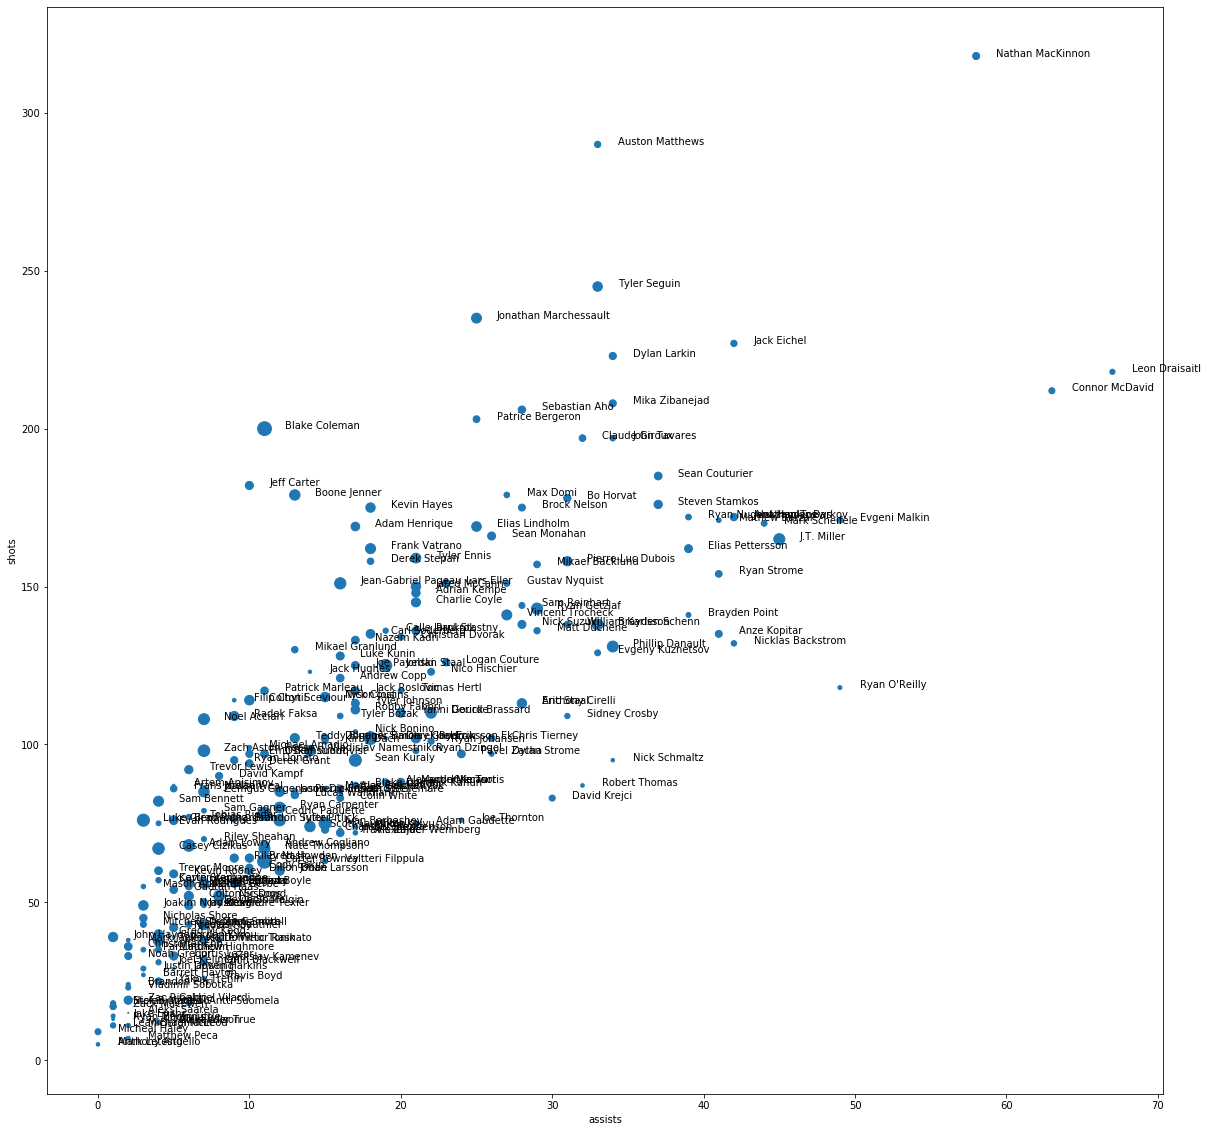

In [51]:
x = assists
y = shots
s = hits

plt.figure(figsize=(20,20))

plt.scatter(x,y, s=s)
plt.xlabel('assists')
plt.ylabel('shots')

for i, txt in enumerate(fullNames):
    plt.annotate(txt, (x[i], y[i]), xytext=(20, 0), textcoords='offset points')

In [52]:
LWfullNames = list(LWStats['fullName'])
LWassists = list(LWStats['assists'])
LWpoints = list(LWStats['points'])
LWshots = list(LWStats['shots'])
LWhits = list(LWStats['hits'])
LWgoals = list(LWStats['goals'])
LWpim = list(LWStats['pim'])
LWppg = list(LWStats['powerPlayGoals'])
LWtimepg = list(LWStats['timeOnIcePerGame'])

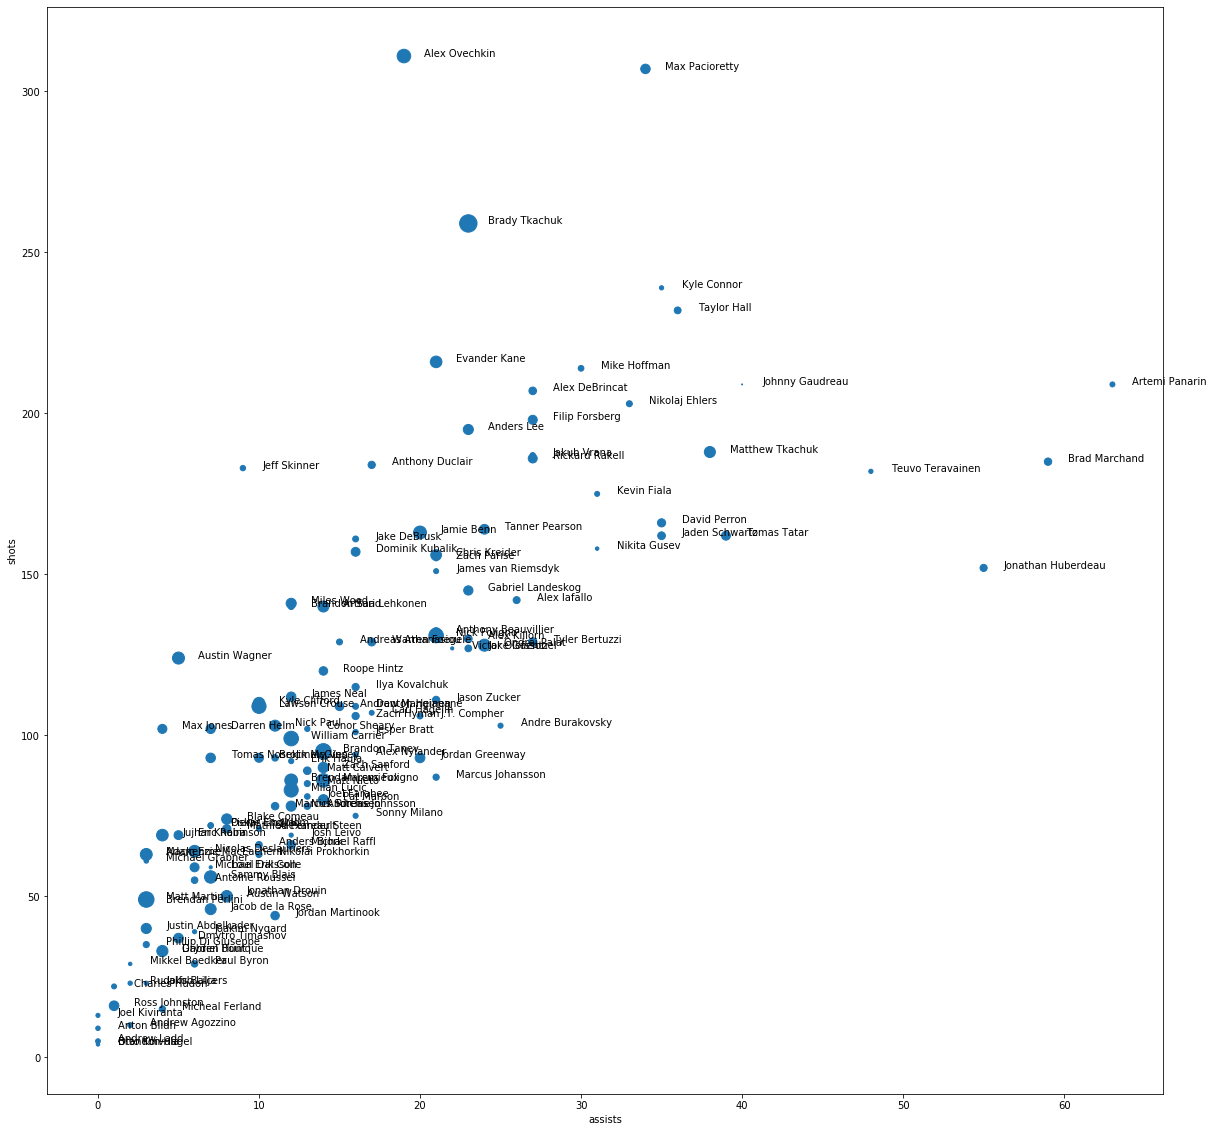

In [53]:
x = LWassists
y = LWshots
s = LWhits

plt.figure(figsize=(20,20))

plt.scatter(x,y, s=s)
plt.xlabel('assists')
plt.ylabel('shots')

for i, txt in enumerate(LWfullNames):
    plt.annotate(txt, (x[i], y[i]), xytext=(20, 0), textcoords='offset points')

In [54]:
RWfullNames = list(RWStats['fullName'])
RWassists = list(RWStats['assists'])
RWpoints = list(RWStats['points'])
RWshots = list(RWStats['shots'])
RWhits = list(RWStats['hits'])
RWgoals = list(RWStats['goals'])
RWpim = list(RWStats['pim'])
RWppg = list(RWStats['powerPlayGoals'])
RWtimepg = list(RWStats['timeOnIcePerGame'])

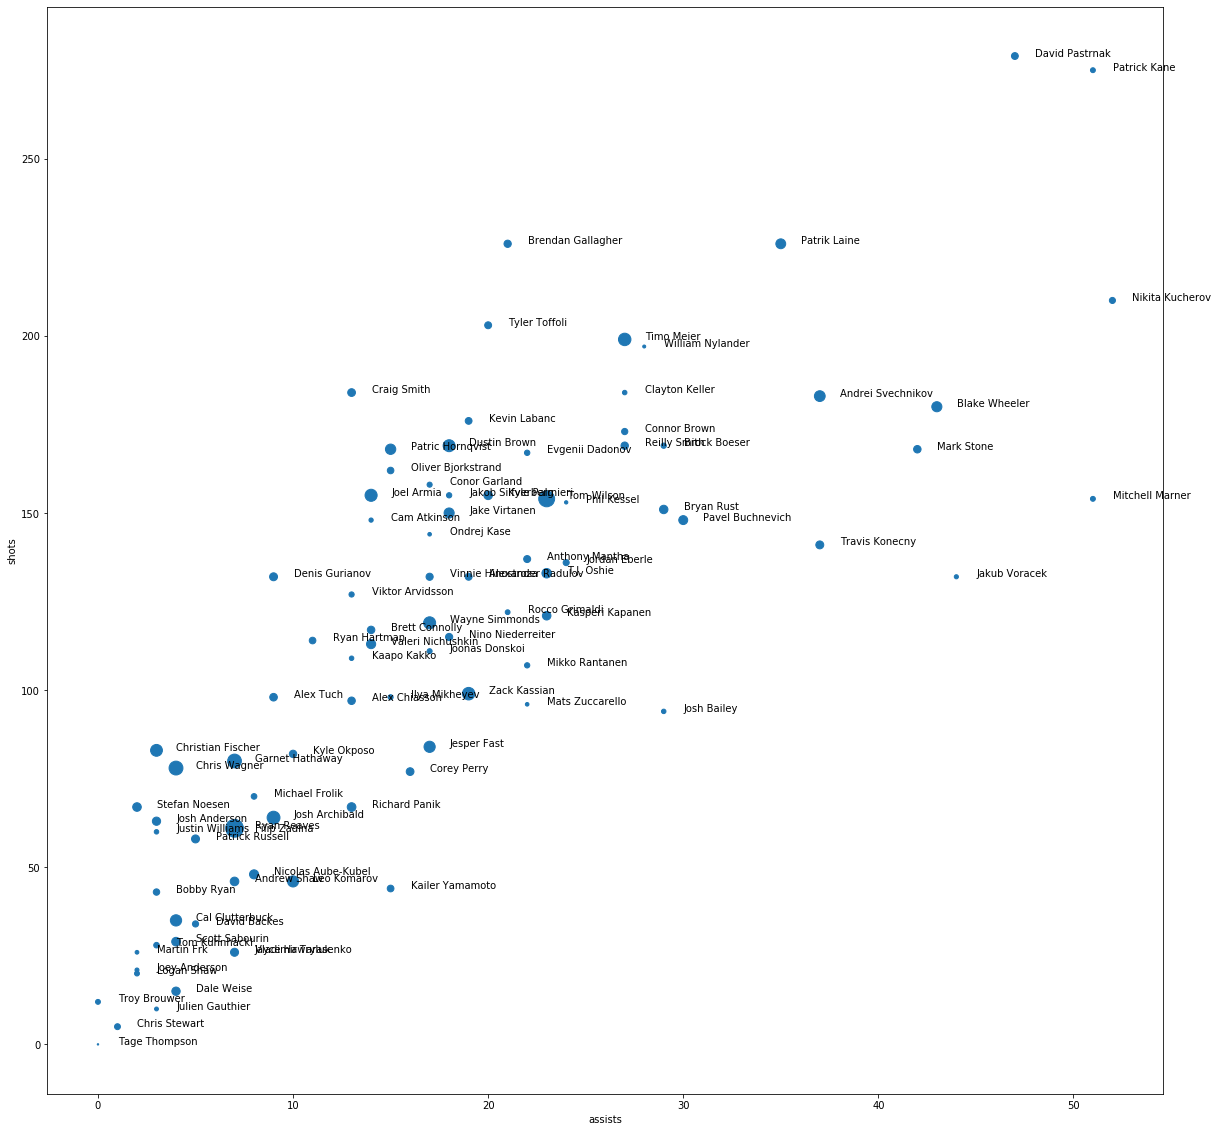

In [55]:
x = RWassists
y = RWshots
s = RWhits

plt.figure(figsize=(20,20))

plt.scatter(x,y, s=s)
plt.xlabel('assists')
plt.ylabel('shots')

for i, txt in enumerate(RWfullNames):
    plt.annotate(txt, (x[i], y[i]), xytext=(20, 0), textcoords='offset points')

In [56]:
DfullNames = list(DStats['fullName'])
Dassists = list(DStats['assists'])
Dpoints = list(DStats['points'])
Dshots = list(DStats['shots'])
Dhits = list(DStats['hits'])
Dgoals = list(DStats['goals'])
Dpim = list(DStats['pim'])
Dppg = list(DStats['powerPlayGoals'])
Dtimepg = list(DStats['timeOnIcePerGame'])

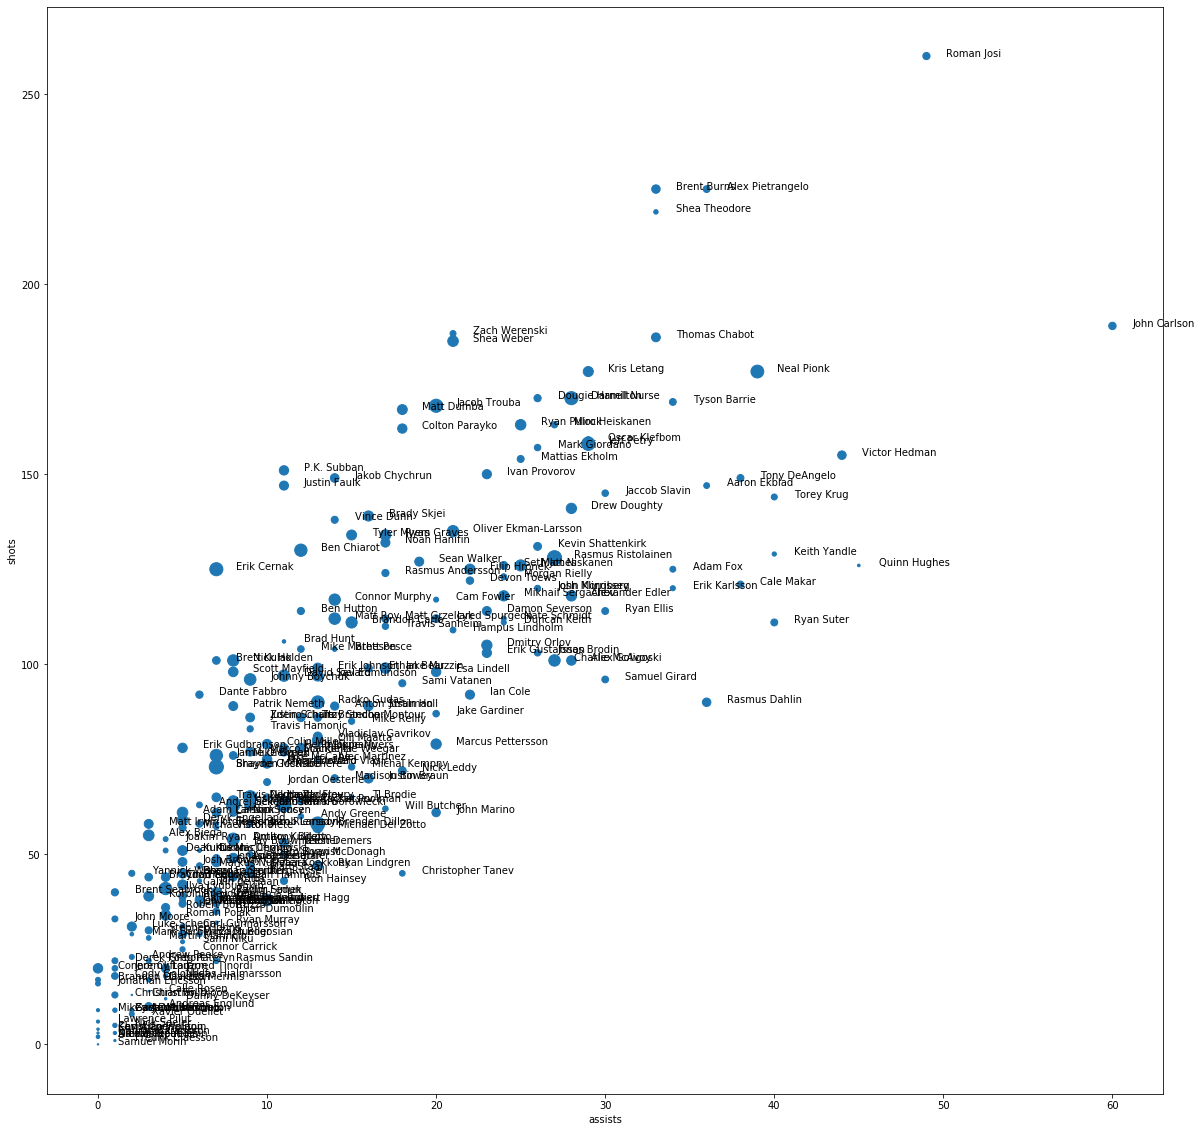

In [57]:
x = Dassists
y = Dshots
s = Dhits

plt.figure(figsize=(20,20))

plt.scatter(x,y, s=s)
plt.xlabel('assists')
plt.ylabel('shots')

for i, txt in enumerate(DfullNames):
    plt.annotate(txt, (x[i], y[i]), xytext=(20, 0), textcoords='offset points')